In [1]:
# Import pandas and plotting libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Scikit-Learn library for the regression models and confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

### Data

In [2]:
data = pd. read_csv("data.csv")

In [3]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)

### Classifier

In [4]:
logistic_reg = LogisticRegression(solver="lbfgs", max_iter=146) 
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=146)

### Logistic Regression Prediction (User Input)

In [5]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    y_log = logistic_reg.predict(test_data)
    
    return y_log

In [41]:
rand_row = X_test.iloc[6]
rand_row_2 = X_test.iloc[9]
rand_row = pd.DataFrame(rand_row).T
rand_row
# test_2 = pd.DataFrame(test_1)
# test_2
# predict(X_test.iloc[6])
# predict(pd.DataFrame(rand_row).T)
# predict(pd.DataFrame(rand_row_2).T)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
369,22.01,21.9,147.2,1482.0,0.1063,0.1954,0.2448,0.1501,0.1824,0.0614


### Sample Train, Test, Split Results

In [6]:
def sample_results():
    '''
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_log = logistic_reg.predict(X_test)
    print("Mean accuracy on test set: ", logistic_reg.score(X_test, y_test))
    print(classification_report(y_test, y_log))
    print("The confusion matrix for the sample dataset using Logistic Regression is displayed below:")
    plot_confusion_matrix(logistic_reg, X_test, y_test)
    plt.show
    
    return

Mean accuracy on test set:  0.9298245614035088
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

The confusion matrix for the sample dataset using Logistic Regression is displayed below:


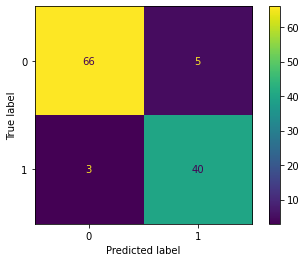

In [7]:
sample_results()

K-Fold cross validation 

In [8]:


# classifier = LogisticRegression(random_state = 0)
# accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
